<a href="https://colab.research.google.com/github/secutron/TesTime/blob/main/Torch_sample%2C_batch_%EB%8B%A4%EB%A3%A8%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Download dataset:
from torchvision.datasets import CIFAR10

'''
지원 종류 확인: https://pytorch.org/vision/stable/datasets.html

MNIST
Fashion-MNIST
KMNIST
EMNIST
FakeData
...
'''

'''
###
# MNIST dataset with (28, 28) sized images
trainset = MNIST(root='./mnist', train=True, transform=transforms.ToTensor(), download=True)
test_set = MNIST(root='./mnist', train=False, transform=transforms.ToTensor(), download=True)

###
# Fashion MNIST dataset with (28, 28) sized images
# Resize images so they are a power of 2
all_transforms = transforms.Compose([
        transforms.Resize(32),
        transforms.ToTensor()
])

trainset = FashionMNIST('../fashionmnist', train=True, download=True, transform=all_transforms)
test_set = FashionMNIST('../fashionmnist', train=False, transform=all_transforms)

###
# CIFAR100 dataset with (32, 32) sized images
train_set = CIFAR100("./cifar100", train=True, download=True);
test_set = CIFAR100("./cifar100", train=False, download=True);

'''

###
# CIFAR10 dataset with (32, 32) sized images

'''
# transform의 ToTensor() 없이 하면... PIL로 가져올 것임.
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
'''
train_set = CIFAR10("./cifar10", train=True, download=True); 
test_set = CIFAR10("./cifar10", train=False, download=True);




Extracting ./cifar10/cifar-10-python.tar.gz to ./cifar10
Files already downloaded and verified


# (Dataset) 샘플 다루기

# cifar10은 <PIL.Image.Image>, <'int'>의 pair

# mnist는 ...

In [2]:
import torch


# exploring


# sample size
print(len(train_set)) # 50000
print(len(test_set)) # 10000



# labels for each sample
print(train_set.targets) # [6, 9, 9 .....
print(train_set.targets[0]) # 6



# 클래스당 샘플 수
import numpy as np
#print(train_set.targets.bincount()) --> X ???
print(np.bincount(train_set.targets)) # [5000 5000 5000 ...



# get a single sample pair
sample = next(iter(train_set))
print(len(sample)) # 2 --> contains two tensor items, image-lable pair.
image, label = sample # unpacking



# check type, tranform(ToTensor) 적용하지 않았으므로... PIL로 가져올 것임.
print(type(image), type(label)) # <PIL.Image.Image>, <'int'>



# check shape
# print(image.shape(), torch.tensor(label).shape) --> X ??

# PIL을 torch.Tensor()로...
import torchvision.transforms as tr
tf = tr.ToTensor()
image_t = tf(image)
print(type(image_t)) # <torch.Tensor>

# check shape
print(image_t.shape, torch.tensor(label).shape) # [3, 32, 32], []



# torch.Tensor를 PIL로
import PIL
tf = tr.ToPILImage()
image_pil = tf(image_t)
print(image_pil) # PIL.Image.Image imge mode=RGB size=32x32 at 0x....

50000
10000
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6, 3, 2, 7, 8, 8, 6, 0, 7, 9, 4, 5, 6, 4, 2, 1, 1, 2, 1, 5, 9, 9, 0, 8, 4, 1, 1, 6, 3, 3, 9, 0, 7, 9, 7, 7, 9, 1, 5, 1, 6, 6, 8, 

In [3]:
# for 루프

for i in range(len(train_set)):
    sample = train_set[i] # or ... image, label = train_set[i]
    print(i, sample[0], sample[1])

    if i == 3:
        break

0 <PIL.Image.Image image mode=RGB size=32x32 at 0x7F67BCFCD090> 6
1 <PIL.Image.Image image mode=RGB size=32x32 at 0x7F67BC88AED0> 9
2 <PIL.Image.Image image mode=RGB size=32x32 at 0x7F67BC88A750> 9
3 <PIL.Image.Image image mode=RGB size=32x32 at 0x7F67BC88A4D0> 4


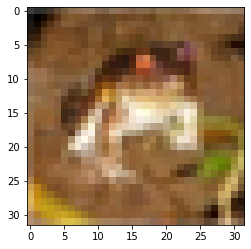

In [4]:
# torch.Tensor일때 표시
import matplotlib.pyplot as plt
plt.imshow(np.transpose(image_t.numpy(), (1, 2, 0)))

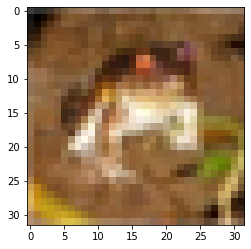

In [5]:
# PIL일 때 표시
plt.imshow(image) 

# (Dataloader) 배치 다루기

In [6]:
print(type(train_set))

image, label = train_set[0]
print(type(image), type(label)) # <PIL.Image.Image>, <int>

<class 'torchvision.datasets.cifar.CIFAR10'>
<class 'PIL.Image.Image'> <class 'int'>


In [7]:
print(train_set.classes)


['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [8]:
# 위에서 transform(ToTensor) 없이 했음에 주의
# train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=True, num_workers=2)
# test_loader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=False, num_workers=2)
# batch = next(iter(train_loader)) --> X.  PIL 때문에 에러


In [18]:
# 데이터셋 부를 때 transform 하는 것이 쉬우나... 나중에라도 하고 싶다면..
# https://discuss.pytorch.org/t/how-to-apply-another-transform-to-an-existing-dataset/85416


print(type(train_set[0][0]), type(train_set[0][1]))

train_set.transform = tr.Compose([tr.ToTensor()])

print(type(train_set[0][0]), type(train_set[0][1]))



<class 'torch.Tensor'> <class 'int'>
<class 'torch.Tensor'> <class 'int'>


In [31]:

train_loader = torch.utils.data.DataLoader(train_set, batch_size=10, shuffle=False, num_workers=2)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=10, shuffle=False, num_workers=2)


In [32]:
# dataset과 달리 dataloader는 indexing 할 수 없.. 할말하많...
# train_loader[0]  --> TypeError: 'DataLoader' object is not subscriptable


images, labels = next(iter(train_loader))
print(type(image), type(label))
batch = next(iter(train_loader))



print(type(batch))
print(len(batch))
print(batch[0].size())  # 배치 내 이미지
print(batch[1].size())  # 배치 내 레이블


print(batch[0][0], batch[0][0].size()) # 배치 내 첫번 째 이미지
print(batch[1][0], batch[1][0].size()) # 배치 내 첫번 째 레이블

print(train_set[0][0], train_set[0][0].size())
print(train_set[0][1])



<class 'PIL.Image.Image'> <class 'int'>
<class 'list'>
2
torch.Size([10, 3, 32, 32])
torch.Size([10])
tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0